In [1]:
from __future__ import print_function

from collections import defaultdict
import sys

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from Bio import PDB

In [2]:
repository = PDB.PDBList()
parser = PDB.PDBParser()
repository.retrieve_pdb_file('1TUP', pdir='.')
p53_1tup = parser.get_structure('P 53', 'pdb1tup.ent')

Structure exists: './pdb1tup.ent' 


/home/tra/Dropbox/soft/biopython/Bio/PDB/StructureBuilder.py:87: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  PDBConstructionWarning)
/home/tra/Dropbox/soft/biopython/Bio/PDB/StructureBuilder.py:87: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6147.
  PDBConstructionWarning)
/home/tra/Dropbox/soft/biopython/Bio/PDB/StructureBuilder.py:87: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6148.
  PDBConstructionWarning)
/home/tra/Dropbox/soft/biopython/Bio/PDB/StructureBuilder.py:87: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6149.
  PDBConstructionWarning)
/home/tra/Dropbox/soft/biopython/Bio/PDB/StructureBuilder.py:87: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6171.
  PDBConstructionWarning)
/home/tra/Dropbox/soft/biopython/Bio/PDB/StructureBuilder.py:87: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6185.
  PDBConstructionWarning)
/home/tra/Dropbox/soft

In [3]:
atom_cnt = defaultdict(int)
atom_chain = defaultdict(int)
atom_res_types = defaultdict(int)

for atom in p53_1tup.get_atoms():
    my_residue = atom.parent
    my_chain = my_residue.parent
    atom_chain[my_chain.id] += 1
    if my_residue.resname != 'HOH':
        atom_cnt[atom.element] += 1
    atom_res_types[my_residue.resname] += 1
print(dict(atom_res_types))
print(dict(atom_chain))
print(dict(atom_cnt))

{'ILE': 144, 'GLN': 189, ' ZN': 3, 'THR': 294, 'HOH': 384, 'GLY': 156, 'ASP': 192, 'PHE': 165, 'TRP': 42, 'GLU': 297, 'CYS': 180, 'HIS': 210, 'SER': 323, 'LYS': 135, ' DG': 176, 'PRO': 294, ' DC': 152, ' DA': 270, 'ALA': 105, 'MET': 144, 'LEU': 336, 'ARG': 561, ' DT': 257, 'VAL': 315, 'ASN': 216, 'TYR': 288}
{'A': 1734, 'C': 1610, 'B': 1593, 'E': 442, 'F': 449}
{'P': 40, 'ZN': 3, 'S': 48, 'C': 3238, 'O': 1114, 'N': 1001}


In [5]:
res_types = defaultdict(int)
res_per_chain = defaultdict(int)
for residue in p53_1tup.get_residues():
    res_types[residue.resname] += 1
    res_per_chain[residue.parent.id] +=1
print(dict(res_types))
print(dict(res_per_chain))

{'ILE': 18, 'GLN': 21, ' ZN': 3, 'THR': 42, 'HOH': 384, 'GLY': 39, 'ASP': 24, 'PHE': 15, 'TRP': 3, 'GLU': 33, 'CYS': 30, 'HIS': 21, 'SER': 54, 'LYS': 15, ' DG': 8, 'PRO': 42, ' DC': 8, ' DA': 13, 'ALA': 21, 'MET': 18, 'LEU': 42, 'ARG': 51, ' DT': 13, 'VAL': 45, 'ASN': 27, 'TYR': 24}
{'A': 395, 'C': 276, 'B': 265, 'E': 43, 'F': 35}


In [6]:
def get_bounds(my_atoms):
    my_min = [sys.maxint] * 3
    my_max = [-sys.maxint] * 3
    for atom in my_atoms:
        for i, coord in enumerate(atom.coord):
            if coord < my_min[i]:
                my_min[i] = coord
            if coord > my_max[i]:
                my_max[i] = coord
    return my_min, my_max

In [7]:
chain_bounds = {}
for chain in p53_1tup.get_chains():
    print(chain.id, get_bounds(chain.get_atoms()))
    chain_bounds[chain.id] = get_bounds(chain.get_atoms())
print(get_bounds(p53_1tup.get_atoms()))

E ([22.989, 6.224, 68.526001], [83.134003, 52.07, 93.046997])
F ([18.075001, 17.921, 67.133003], [81.553001, 51.854, 92.927002])
A ([47.912998, 3.1459999, 35.011002], [101.837, 52.296001, 81.497002])
B ([46.526001, -9.6070004, 61.584], [94.362999, 37.123001, 108.068])
C ([14.611, -26.648001, 60.367001], [62.141998, 18.871, 110.81])
([14.611, -26.648001, 35.011002], [101.837, 52.296001, 110.81])


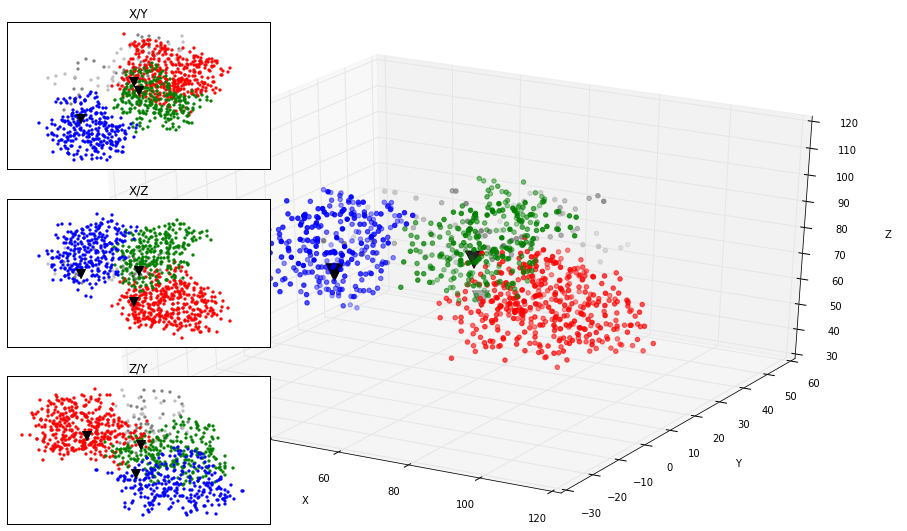

In [8]:
#matplotlib 3d plot
fig = plt.figure(figsize=(16, 9))
ax3d = fig.add_subplot(111, projection='3d')
ax_xy = fig.add_subplot(331)
ax_xy.set_title('X/Y')
ax_xz = fig.add_subplot(334)
ax_xz.set_title('X/Z')
ax_zy = fig.add_subplot(337)
ax_zy.set_title('Z/Y')
color = {'A': 'r', 'B': 'g', 'C': 'b', 'E': '0.5', 'F': '0.75'}
zx, zy, zz = [], [], []
for chain in p53_1tup.get_chains():
    xs, ys, zs = [], [], []
    for residue in chain.get_residues():
        ref_atom = next(residue.get_iterator())
        x, y, z = ref_atom.coord
        if ref_atom.element == 'ZN':
            zx.append(x)
            zy.append(y)
            zz.append(z)
            continue
        xs.append(x)
        ys.append(y)
        zs.append(z)
    ax3d.scatter(xs, ys, zs, color=color[chain.id])
    ax_xy.scatter(xs, ys, marker='.', color=color[chain.id])
    ax_xz.scatter(xs, zs, marker='.', color=color[chain.id])
    ax_zy.scatter(zs, ys, marker='.', color=color[chain.id])
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
ax3d.scatter(zx, zy, zz, color='k', marker='v', s=300)
ax_xy.scatter(zx, zy, color='k', marker='v', s=80)
ax_xz.scatter(zx, zz, color='k', marker='v', s=80)
ax_zy.scatter(zz, zy, color='k', marker='v', s=80)
for ax in [ax_xy, ax_xz, ax_zy]:
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)